In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_few_shots.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_few_shots.csv False 2048


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/shots-50                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-00                     1133 non-null   object
 9   Qwen/Qwe

/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [6]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [7]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "shots" in col]
openai_cols

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-01',
 'gpt-4o-mini/shots-03',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-01',
 'gpt-4o/shots-03',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-50']

In [8]:
result_columns = df.columns[2:].to_list()
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/shots-00',
 'Qwen/Qwen2-72B-Instruct/shots-01',
 'Qwen/Qwen2-72B-Instruct/shots-03',
 'Qwen/Qwen2-72B-Instruct/shots-05',
 'Qwen/Qwen2-72B-Instruct/shots-10',
 'Qwen/Qwen2-72B-Instruct/shots-50',
 'Qwen/Qwen2-7B-Instruct/shots-00',
 'Qwen/Qwen2-7B-Instruct/shots-01',
 'Qwen/Qwen2-7B-Instruct/shots-03',
 'Qwen/Qwen2-7B-Instruct/shots-05',
 'Qwen/Qwen2-7B-Instruct/shots-10',
 'Qwen/Qwen2-7B-Instruct/shots-50',
 'internlm/internlm2_5-7b-chat/shots-00',
 'internlm/internlm2_5-7b-chat/shots-01',
 'internlm/internlm2_5-7b-chat/shots-03',
 'internlm/internlm2_5-7b-chat/shots-05',
 'internlm/internlm2_5-7b-chat/shots-10',
 'internlm/internlm2_5-7b-chat/shots-50',
 'microsoft/Phi-3.5-mini-instruct/shots-00',
 'microsoft/Phi-3.5-mini-instruct/shots-01',
 'microsoft/Phi-3.5-mini-instruct/shots-03',
 'microsoft/Phi-3.5-mini-instruct/shots-05',
 'microsoft/Phi-3.5-mini-instruct/shots-10',
 'microsoft/Phi-3.5-mini-instruct/shots-50',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat

In [9]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]

In [10]:
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/shots-00',
  'Qwen/Qwen2-72B-Instruct/shots-01',
  'Qwen/Qwen2-72B-Instruct/shots-03',
  'Qwen/Qwen2-72B-Instruct/shots-05',
  'Qwen/Qwen2-72B-Instruct/shots-10',
  'Qwen/Qwen2-72B-Instruct/shots-50',
  'Qwen/Qwen2-7B-Instruct/shots-00',
  'Qwen/Qwen2-7B-Instruct/shots-01',
  'Qwen/Qwen2-7B-Instruct/shots-03',
  'Qwen/Qwen2-7B-Instruct/shots-05',
  'Qwen/Qwen2-7B-Instruct/shots-10',
  'Qwen/Qwen2-7B-Instruct/shots-50',
  'internlm/internlm2_5-7b-chat/shots-00',
  'internlm/internlm2_5-7b-chat/shots-01',
  'internlm/internlm2_5-7b-chat/shots-03',
  'internlm/internlm2_5-7b-chat/shots-05',
  'internlm/internlm2_5-7b-chat/shots-10',
  'internlm/internlm2_5-7b-chat/shots-50',
  'microsoft/Phi-3.5-mini-instruct/shots-00',
  'microsoft/Phi-3.5-mini-instruct/shots-01',
  'microsoft/Phi-3.5-mini-instruct/shots-03',
  'microsoft/Phi-3.5-mini-instruct/shots-05',
  'microsoft/Phi-3.5-mini-instruct/shots-10',
  'microsoft/Phi-3.5-mini-instruct/shots-50',
  'shenzhi-wang/

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/shots-00                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/shots-01                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/shots-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/shots-05                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/shots-10                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/shots-50                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/shots-00                     1133 non-null   object
 9   Qwen/Qwe

In [12]:
%%time

metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant="shots")
metrics_df["shots"] = metrics_df["shots"].apply(lambda x: int(x))
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'microsoft/Phi-3.5-mini-instruct'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini' 'gpt-4o']


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-00: {'comet': 0.7323994389015915, 'meteor': 0.4003638205699929, 'sacrebleu': {'score': 12.223832517678616, 'counts': [13560, 5107, 2440, 1248], 'totals': [32899, 31766, 30634, 29502], 'precisions': [41.217058269248305, 16.07693760624567, 7.965006202258928, 4.230221679886109], 'bp': 1.0, 'sys_len': 32899, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12223832517678616, 'precisions': [0.4121705826924831, 0.16076937606245673, 0.07965006202258929, 0.04230221679886109], 'brevity_penalty': 1.0, 'length_ratio': 1.0897316992381583, 'translation_length': 32899, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44356645307125253, 'rouge2': 0.1960612864061525, 'rougeL': 0.3851949841526633, 'rougeLsum': 0.38500120690341616}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-01: {'comet': 0.7378563016837189, 'meteor': 0.4068727655718769, 'sacrebleu': {'score': 13.151008586303575, 'counts': [13563, 5186, 2514, 1287], 'totals': [31260, 30127, 28995, 27863], 'precisions': [43.38771593090211, 17.213794934776114, 8.67046042421107, 4.619028819581524], 'bp': 1.0, 'sys_len': 31260, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13151008586303575, 'precisions': [0.4338771593090211, 0.17213794934776114, 0.08670460424211071, 0.04619028819581524], 'brevity_penalty': 1.0, 'length_ratio': 1.0354421994037761, 'translation_length': 31260, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45300585326319137, 'rouge2': 0.2033405105446149, 'rougeL': 0.39488433940070566, 'rougeLsum': 0.3946314871430704}, 'accuracy': 0.00176522506619594, 'correct_ids': [77, 364]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-03: {'comet': 0.7384351547166298, 'meteor': 0.4086244766794449, 'sacrebleu': {'score': 13.771788946915247, 'counts': [13620, 5265, 2566, 1320], 'totals': [30391, 29258, 28127, 26998], 'precisions': [44.81589944391432, 17.995078269191332, 9.122906815515341, 4.889251055633751], 'bp': 1.0, 'sys_len': 30391, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13771788946915253, 'precisions': [0.44815899443914314, 0.17995078269191334, 0.09122906815515341, 0.048892510556337504], 'brevity_penalty': 1.0, 'length_ratio': 1.0066578337197747, 'translation_length': 30391, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45704097150804474, 'rouge2': 0.20791843864661003, 'rougeL': 0.3983033679312822, 'rougeLsum': 0.39811624744213453}, 'accuracy': 0.00264783759929391, 'correct_ids': [77, 533, 659]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-05: {'comet': 0.7413169018799293, 'meteor': 0.4132330811975005, 'sacrebleu': {'score': 14.397738721508986, 'counts': [13721, 5398, 2689, 1413], 'totals': [29891, 28758, 27626, 26496], 'precisions': [45.90344919875548, 18.770429097990124, 9.733584304640557, 5.332880434782608], 'bp': 0.9900468527732591, 'sys_len': 29891, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1439773872150899, 'precisions': [0.4590344919875548, 0.18770429097990124, 0.09733584304640557, 0.05332880434782609], 'brevity_penalty': 0.9900468527732591, 'length_ratio': 0.9900960582974495, 'translation_length': 29891, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.46220617661095054, 'rouge2': 0.21441437127279625, 'rougeL': 0.4042454284664394, 'rougeLsum': 0.4038475871746319}, 'accuracy': 0.00264783759929391, 'correct_ids': [77, 533, 659]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-10: {'comet': 0.743670300898674, 'meteor': 0.41598174489789025, 'sacrebleu': {'score': 14.493475334416772, 'counts': [13763, 5444, 2695, 1430], 'totals': [29776, 28643, 27511, 26381], 'precisions': [46.22178936055884, 19.006388995566105, 9.79608156737305, 5.420567832910049], 'bp': 0.9861923964657416, 'sys_len': 29776, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14493475334416772, 'precisions': [0.4622178936055884, 0.19006388995566106, 0.09796081567373051, 0.05420567832910049], 'brevity_penalty': 0.9861923964657416, 'length_ratio': 0.9862868499503147, 'translation_length': 29776, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4637116964877997, 'rouge2': 0.21679360360841113, 'rougeL': 0.40702667945464144, 'rougeLsum': 0.40654966920705127}, 'accuracy': 0.00441306266548985, 'correct_ids': [77, 195, 364, 533, 659]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/shots-50: {'comet': 0.748192870159225, 'meteor': 0.4401536409204816, 'sacrebleu': {'score': 15.386348939006842, 'counts': [14308, 5822, 2910, 1559], 'totals': [30383, 29250, 28117, 26985], 'precisions': [47.09212388506731, 19.904273504273505, 10.349610555891454, 5.777283676116361], 'bp': 1.0, 'sys_len': 30383, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1538634893900684, 'precisions': [0.47092123885067305, 0.19904273504273504, 0.10349610555891453, 0.05777283676116361], 'brevity_penalty': 1.0, 'length_ratio': 1.0063928453130175, 'translation_length': 30383, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4752563041068361, 'rouge2': 0.22408730857274028, 'rougeL': 0.41780089995394565, 'rougeLsum': 0.4175557719854376}, 'accuracy': 0.00529567519858782, 'correct_ids': [77, 364, 533, 567, 659, 1000]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-00: {'comet': 0.7170163004511979, 'meteor': 0.377477070949433, 'sacrebleu': {'score': 11.783492823424513, 'counts': [12792, 4573, 2098, 1029], 'totals': [29888, 28755, 27622, 26500], 'precisions': [42.79978586723769, 15.903321161537123, 7.595394975019912, 3.883018867924528], 'bp': 0.9899464881168306, 'sys_len': 29888, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11783492823424507, 'precisions': [0.4279978586723769, 0.15903321161537123, 0.07595394975019912, 0.03883018867924528], 'brevity_penalty': 0.9899464881168306, 'length_ratio': 0.9899966876449156, 'translation_length': 29888, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42495006185055584, 'rouge2': 0.17672389162225344, 'rougeL': 0.36816938380441866, 'rougeLsum': 0.36798891539706274}, 'accuracy': 0.00088261253309797, 'correct_ids': [364]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-01: {'comet': 0.7265785399360775, 'meteor': 0.38000752971097884, 'sacrebleu': {'score': 11.731917392837621, 'counts': [12745, 4565, 2102, 1013], 'totals': [29621, 28488, 27359, 26231], 'precisions': [43.02690658654333, 16.02429092951418, 7.683029350487956, 3.861842857687469], 'bp': 0.9809739790210252, 'sys_len': 29621, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11731917392837622, 'precisions': [0.4302690658654333, 0.16024290929514182, 0.07683029350487956, 0.03861842857687469], 'brevity_penalty': 0.9809739790210252, 'length_ratio': 0.9811526995693939, 'translation_length': 29621, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42641218009701837, 'rouge2': 0.1787681914388527, 'rougeL': 0.3717363894527024, 'rougeLsum': 0.3717294912564508}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-03: {'comet': 0.7319961582151853, 'meteor': 0.38678180999660744, 'sacrebleu': {'score': 12.368875746156336, 'counts': [13100, 4777, 2227, 1098], 'totals': [29632, 28499, 27367, 26236], 'precisions': [44.20896328293737, 16.761991648829785, 8.137537910622282, 4.185089190425369], 'bp': 0.9813452019261544, 'sys_len': 29632, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12368875746156333, 'precisions': [0.44208963282937364, 0.16761991648829783, 0.08137537910622282, 0.041850891904253694], 'brevity_penalty': 0.9813452019261544, 'length_ratio': 0.981517058628685, 'translation_length': 29632, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.43594960722762865, 'rouge2': 0.18624830037712836, 'rougeL': 0.37813188062437864, 'rougeLsum': 0.3779103475798729}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/shots-05: {'comet': 0.7349877990880901, 'meteor': 0.38784856371389564, 'sacrebleu': {'score': 12.277254698204828, 'counts': [13046, 4733, 2192, 1095], 'totals': [29162, 28029, 26898, 25768], 'precisions': [44.736300665249296, 16.88608227193264, 8.149304781024611, 4.249456690468799], 'bp': 0.9653627374890931, 'sys_len': 29162, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1227725469820483, 'precisions': [0.44736300665249296, 0.16886082271932643, 0.08149304781024612, 0.04249456690468798], 'brevity_penalty': 0.9653627374890931, 'length_ratio': 0.9659489897316993, 'translation_length': 29162, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4410642324915718, 'rouge2': 0.19116962869982113, 'rougeL': 0.38271772243376667, 'rougeLsum': 0.3823747880257348}, 'accuracy': 0.0, 'correct_ids': []}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


In [119]:
time_df = load_eval_times("logs", total_entries=len(df))
time_df

Loading content of logs/l40-1gpu-1.txt
Error processing log file: logs/l40-1gpu-1.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-1gpu-2.txt
Loading content of logs/l40-1gpu-3.txt
Loading content of logs/l40-1gpu-4.txt
Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu-rpp-4.txt
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/l40-4gpu-8.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.tx

model  shots   eval_time
0                internlm/internlm2_5-7b-chat      0    1.224184
1                internlm/internlm2_5-7b-chat      1    1.312445
2                internlm/internlm2_5-7b-chat      3    1.857899
3                internlm/internlm2_5-7b-chat      5    2.860547
4                internlm/internlm2_5-7b-chat     10    5.722860
5                internlm/internlm2_5-7b-chat     50   42.292145
6                      Qwen/Qwen2-7B-Instruct      0    0.980583
7                      Qwen/Qwen2-7B-Instruct      1    1.052957
8                      Qwen/Qwen2-7B-Instruct      3    1.601059
9                      Qwen/Qwen2-7B-Instruct      5    2.289497
10                     Qwen/Qwen2-7B-Instruct     10    4.006178
11                     Qwen/Qwen2-7B-Instruct     50   17.464254
12  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0    1.204766
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1    1.481906
14  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3    2.262136
15  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5    3.388350
16  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10    6.558694
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50   29.659312
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0    1.075022
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1    1.157105
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3    1.981465
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5    2.814651
22            microsoft/Phi-3.5-mini-instruct      0    0.983230
23            microsoft/Phi-3.5-mini-instruct      1    1.207414
24            microsoft/Phi-3.5-mini-instruct      3    1.596646
25            microsoft/Phi-3.5-mini-instruct      5    2.930274
26            microsoft/Phi-3.5-mini-instruct     10    6.857899
27            microsoft/Phi-3.5-mini-instruct     50   59.488085
28                    Qwen/Qwen2-72B-Instruct      0    8.894969
29                    Qwen/Qwen2-72B-Instruct      1    8.983230
30                    Qwen/Qwen2-72B-Instruct      3   11.657546
31                    Qwen/Qwen2-72B-Instruct      5   17.167696
32                    Qwen/Qwen2-72B-Instruct     10   29.728155
33                    Qwen/Qwen2-72B-Instruct     50  112.503972
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0    7.833186
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1    8.307149
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3   11.681377
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5   17.233892
38      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50   41.866726
39     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  117.984113
40                                gpt-4o-mini      0    1.593998
41                                gpt-4o-mini      1    1.566637
42                                gpt-4o-mini      3    1.286849
43                                gpt-4o-mini      5    1.203883
44                                gpt-4o-mini     10    1.187996
45                                gpt-4o-mini     50    1.289497
46                                     gpt-4o      0    1.528685
47                                     gpt-4o      1    1.203883
48                                     gpt-4o      3    2.052074
49                                     gpt-4o      5    1.684025
50                                     gpt-4o     10    1.789938
51                                     gpt-4o     50    2.025596

In [120]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", "shots"], how="left")
metrics_df

model  shots    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct      0  0.400364  12.223833   
1                     Qwen/Qwen2-72B-Instruct      1  0.406873  13.151009   
2                     Qwen/Qwen2-72B-Instruct      3  0.408624  13.771789   
3                     Qwen/Qwen2-72B-Instruct      5  0.413233  14.397739   
4                     Qwen/Qwen2-72B-Instruct     10  0.415982  14.493475   
5                     Qwen/Qwen2-72B-Instruct     50  0.440154  15.386349   
6                      Qwen/Qwen2-7B-Instruct      0  0.377477  11.783493   
7                      Qwen/Qwen2-7B-Instruct      1  0.380008  11.731917   
8                      Qwen/Qwen2-7B-Instruct      3  0.386782  12.368876   
9                      Qwen/Qwen2-7B-Instruct      5  0.387849  12.277255   
10                     Qwen/Qwen2-7B-Instruct     10  0.385265  12.535252   
11                     Qwen/Qwen2-7B-Instruct     50  0.395346  12.949952   
12               internlm/internlm2_5-7b-chat      0  0.368168  11.360521   
13               internlm/internlm2_5-7b-chat      1  0.371959  11.577076   
14               internlm/internlm2_5-7b-chat      3  0.374711  11.548260   
15               internlm/internlm2_5-7b-chat      5  0.372856  11.541535   
16               internlm/internlm2_5-7b-chat     10  0.375090  11.696493   
17               internlm/internlm2_5-7b-chat     50  0.372131  11.404688   
18            microsoft/Phi-3.5-mini-instruct      0  0.288749   6.616686   
19            microsoft/Phi-3.5-mini-instruct      1  0.290143   6.816155   
20            microsoft/Phi-3.5-mini-instruct      3  0.302228   7.280006   
21            microsoft/Phi-3.5-mini-instruct      5  0.301426   7.355237   
22            microsoft/Phi-3.5-mini-instruct     10  0.304668   7.609684   
23            microsoft/Phi-3.5-mini-instruct     50  0.299616   7.225022   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat      0  0.363870  10.874678   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat      1  0.379568  11.805442   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat      3  0.386225  12.306661   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat      5  0.389549  12.582030   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat     10  0.389752  12.957008   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat     50  0.399544  13.257849   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat      0  0.347622   9.799439   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat      1  0.354308  10.438368   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat      3  0.360074  10.709900   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat      5  0.362319  11.204735   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat     10  0.361526  10.125227   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat     50  0.358565   8.429534   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      0  0.328500   8.313795   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      1  0.334212   8.857909   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      3  0.343562   9.605927   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat      5  0.344291   9.638490   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     10  0.340843   9.735670   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat     50  0.361842  10.486403   
42                                gpt-4o-mini      0  0.379770  12.082384   
43                                gpt-4o-mini      1  0.377214  12.013402   
44                                gpt-4o-mini      3  0.377299  12.400311   
45                                gpt-4o-mini      5  0.355418  12.024643   
46                                gpt-4o-mini     10  0.373360  12.576008   
47                                gpt-4o-mini     50  0.404469  13.972884   
48                                     gpt-4o      0  0.379742  12.054600   
49                                     gpt-4o      1  0.375886  12.049862   
50                                     gpt-4o      3  0.376851  12.408746   
51                                  

In [121]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini',
       'gpt-4o'], dtype=object)

In [122]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [123]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [124]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df["shots"].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df["shots"]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Number of Shots")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.93 if len(columns) > 1 else -0.59),
    )

    plt.show()

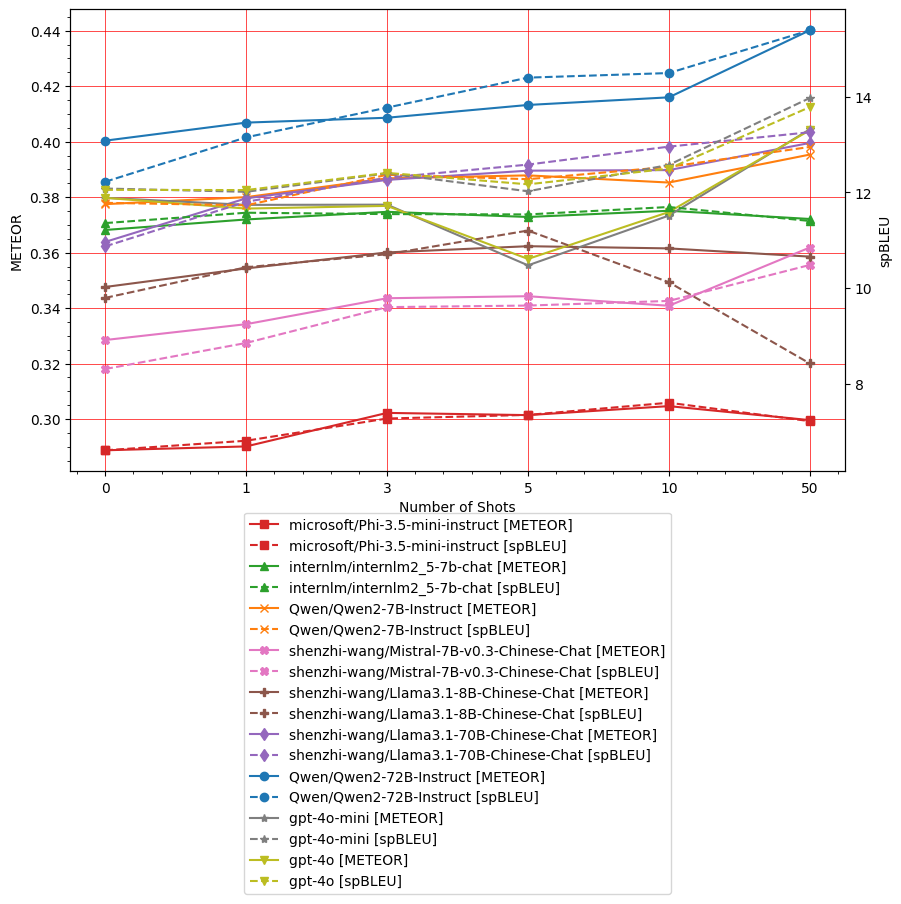

In [125]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

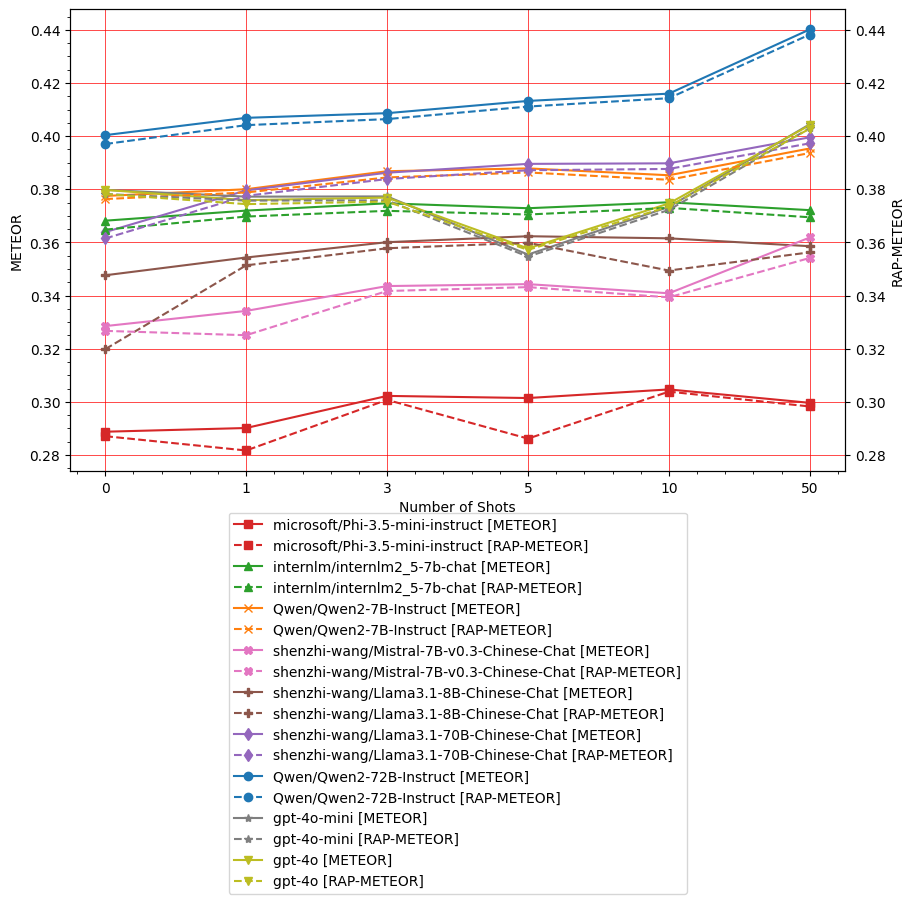

In [126]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

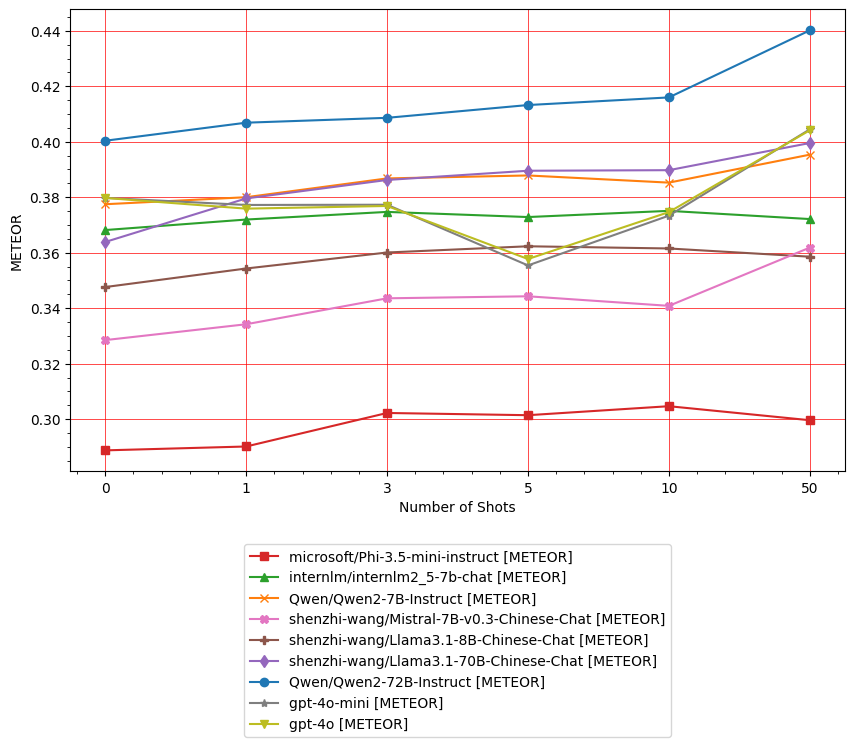

In [127]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

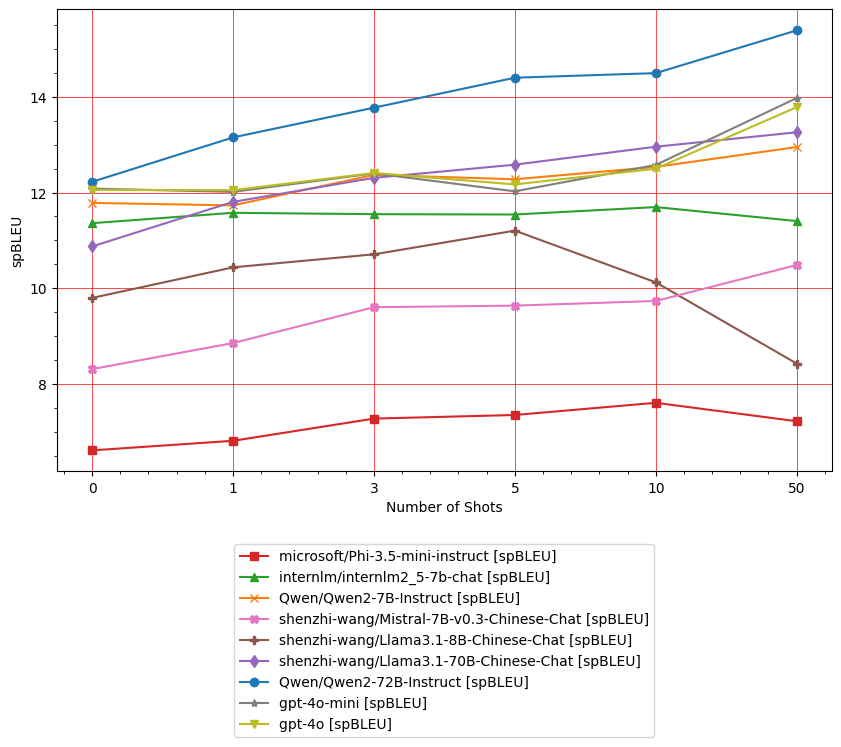

In [128]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

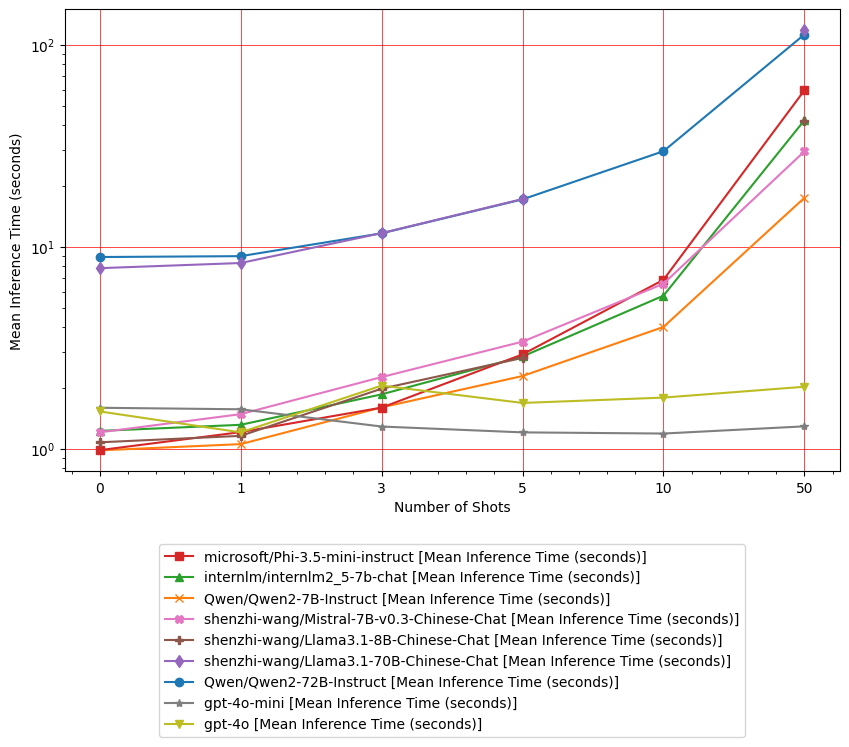

In [129]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    [True]
)

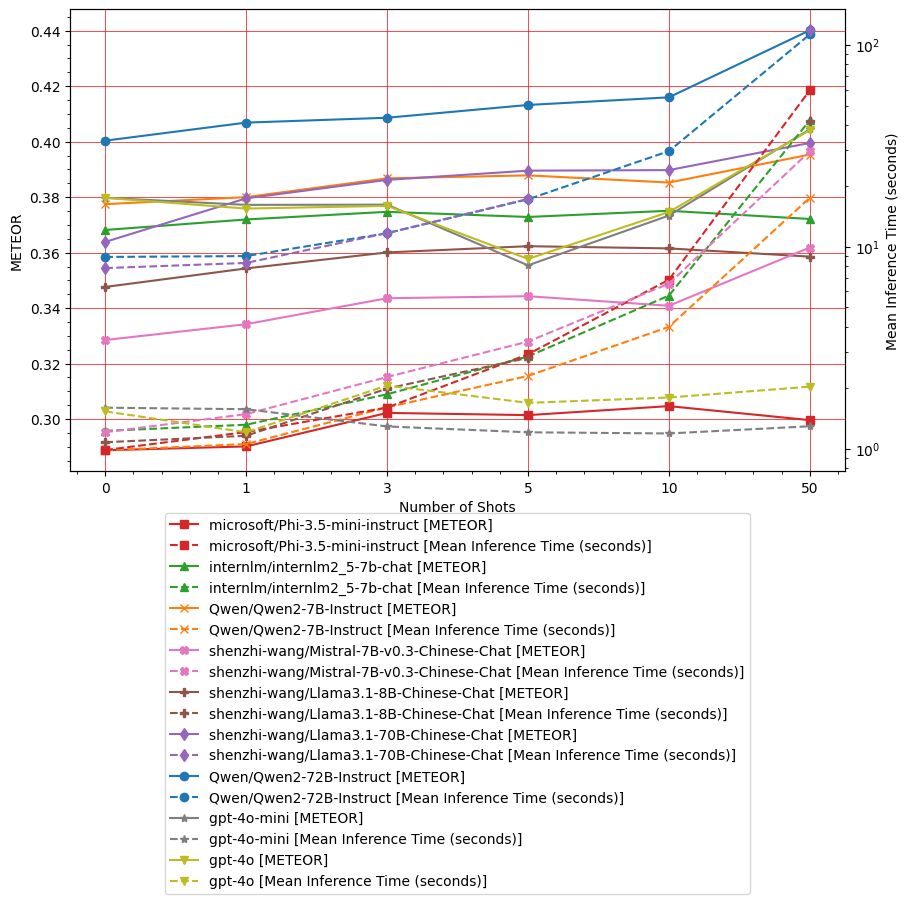

In [130]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    [False, True]
)

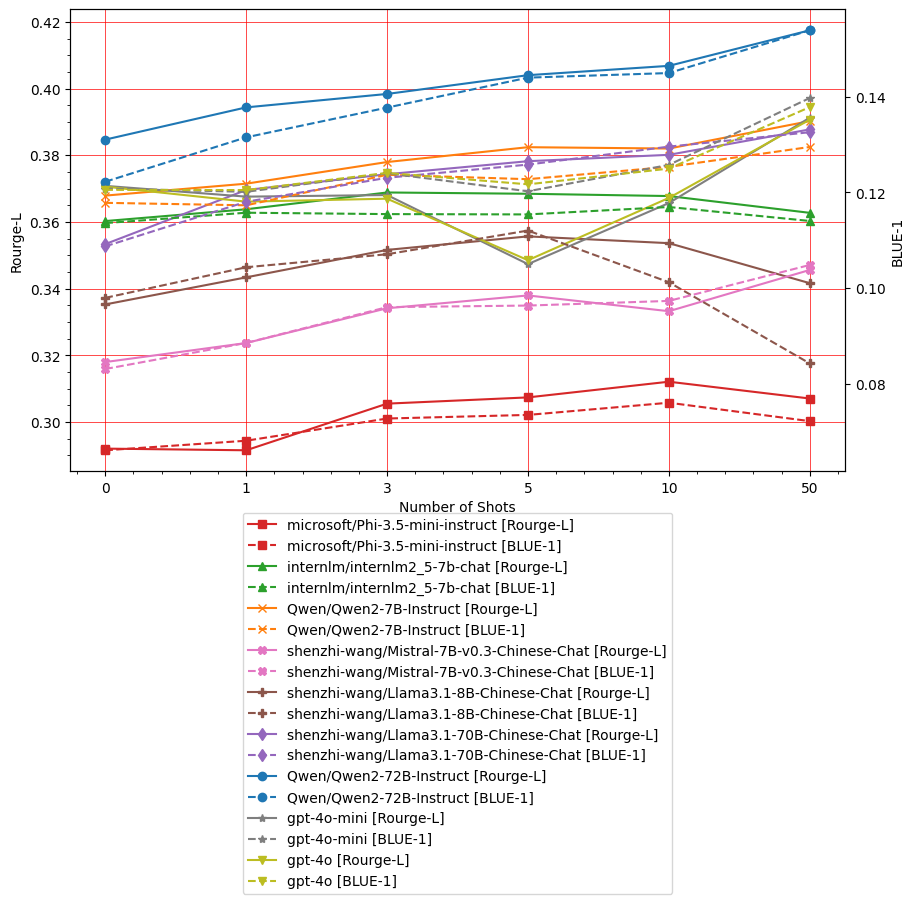

In [131]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

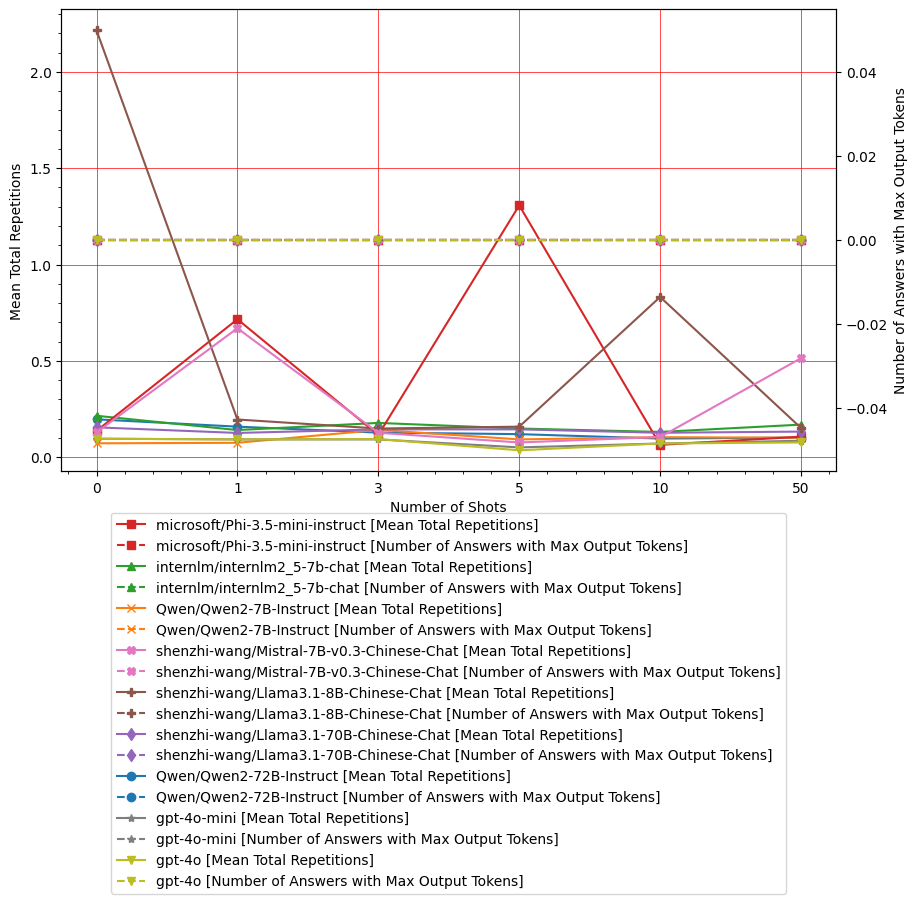

In [132]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

In [133]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/shots-00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/shots-00

*** Found 1 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/shots-00
--------------------------------------------------
chinese: 话都说得有些不搭调，可也是借酒吐真言，放了平时则是难出口的。
--------------------------------------------------
english: Her words were inappropriate to the occasion; obviously, alcohol was bringing out some hidden truths.
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/shots-00: Though his words were somewhat incoherent, he was speaking the truth by借助the aid of alcohol, which would be hard to utter under normal circumstances. 

Note: "借酒吐真言" is a Chinese idiom that means "to speak the truth with the aid of alcohol". However, since the instruction is not to provide additional sentences, I have included the translation of the idiom in brackets. If you prefer not to have this, the sentence would be: 

Though his words were s

In [134]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [135]:
metrics_df.describe()

shots     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  54.000000  54.000000  54.000000  54.000000  54.000000       54.0   
mean   11.500000   0.367822  11.301196   0.113012   0.359692        0.0   
std    17.683539   0.032843   2.067764   0.020678   0.029003        0.0   
min     0.000000   0.288749   6.616686   0.066167   0.291530        0.0   
25%     1.000000   0.355995  10.203512   0.102035   0.343943        0.0   
50%     4.000000   0.374677  11.794467   0.117945   0.367093        0.0   
75%    10.000000   0.386643  12.475866   0.124759   0.378159        0.0   
max    50.000000   0.440154  15.386349   0.153863   0.417480        0.0   

       repetition_score  total_repetitions        rap  \
count         54.000000          54.000000  54.000000   
mean           0.220245           0.220245   0.364662   
std            0.354235           0.354235   0.034266   
min            0.035305           0.035305   0.281685   
25%            0.092233           0.092233   0.352055   
50%            0.126214           0.126214   0.372605   
75%            0.153575           0.153575   0.384291   
max            2.216240           2.216240   0.438232   

       num_incomplete_translations  num_max_output_tokens   eval_time  
count                    54.000000                   54.0   52.000000  
mean                     34.648148                    0.0   11.914743  
std                      31.107335                    0.0   24.148014  
min                       4.000000                    0.0    0.980583  
25%                      16.000000                    0.0    1.306708  
50%                      22.000000                    0.0    2.157105  
75%                      42.500000                    0.0    8.917034  
max                     137.000000                    0.0  117.984113